<a href="https://colab.research.google.com/github/sipra1304/ML_projects/blob/main/MNIST_digits_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [ ]:
df=pd.read_csv('/content/mnist_train.csv')

In [ ]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df= np.array(df)
m, n = df.shape
np.random.shuffle(df)

df_dev = df[0:1000].T
Y_dev = df_dev[0]
X_dev = df_dev[1:n]
X_dev = X_dev / 255

df_train = df[1000:m].T
Y_train = df_train[0]
X_train = df_train[1:n]
X_train = X_train / 255
_,m_train = X_train.shape

In [ ]:
Y_train

array([5., 5., 6., ..., 3., 8., 1.])

In [ ]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
def init_par():
  W1 = np.random.rand(10, 784)- 0.5
  b1 = np.random.rand(10, 1)- 0.5
  W2 = np.random.rand(10, 10)- 0.5
  b2 = np.random.rand(10, 1)- 0.5
  return W1,b1,W2,b2

def RELU(Z):
  return np.maximum(Z,0)


def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A


def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = RELU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def derivative_of_RELU(z):
  return z > 0

def one_hot(Y):

    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * derivative_of_RELU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def upd_par(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

def get_preds(A2):
    return np.argmax(A2, 0)

def accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size


In [ ]:
def gradient_descent(X, Y, iters, alpha):
  W1, b1, W2, b2 = init_par()
  for i in range(iters):
    Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
    dw1, db1, dw2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
    W1, b1, W2, b2 = upd_par(W1, b1, W2, b2, dw1, db1, dw2, db2, alpha)
    if i % 10 == 0:
      print("INTERATIONS: ",i)
      preds = get_preds(A2)
      print("ACCURACY: ",accuracy(preds, Y))
  return W1, b1, W2, b2



In [ ]:
W1, b1, W2, b2 = gradient_descent(X_train,Y_train.astype(int), 1000 ,0.10)

INTERATIONS:  0
[8 8 8 ... 8 8 8] [5 5 6 ... 3 8 1]
ACCURACY:  0.08732612055641421
INTERATIONS:  10
[3 8 8 ... 8 8 1] [5 5 6 ... 3 8 1]
ACCURACY:  0.14528593508500773
INTERATIONS:  20
[3 0 8 ... 8 8 1] [5 5 6 ... 3 8 1]
ACCURACY:  0.23647604327666152
INTERATIONS:  30
[3 0 7 ... 9 0 1] [5 5 6 ... 3 8 1]
ACCURACY:  0.28129829984544047
INTERATIONS:  40
[3 0 7 ... 9 0 1] [5 5 6 ... 3 8 1]
ACCURACY:  0.3276661514683153
INTERATIONS:  50
[3 0 7 ... 9 0 1] [5 5 6 ... 3 8 1]
ACCURACY:  0.37248840803709427
INTERATIONS:  60
[3 0 1 ... 9 0 1] [5 5 6 ... 3 8 1]
ACCURACY:  0.3979907264296754
INTERATIONS:  70
[3 0 1 ... 9 0 1] [5 5 6 ... 3 8 1]
ACCURACY:  0.43585780525502316
INTERATIONS:  80
[9 0 3 ... 9 0 1] [5 5 6 ... 3 8 1]
ACCURACY:  0.46908809891808345
INTERATIONS:  90
[9 0 3 ... 9 0 1] [5 5 6 ... 3 8 1]
ACCURACY:  0.49227202472952086
INTERATIONS:  100
[8 0 3 ... 9 0 1] [5 5 6 ... 3 8 1]
ACCURACY:  0.5193199381761978
INTERATIONS:  110
[8 0 3 ... 9 0 1] [5 5 6 ... 3 8 1]
ACCURACY:  0.541731066460

In [ ]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_preds(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [5]
Label:  5.0


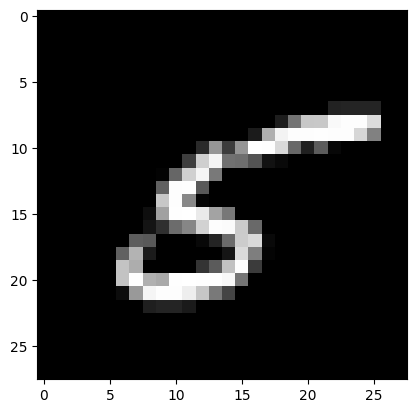

Prediction:  [5]
Label:  5.0


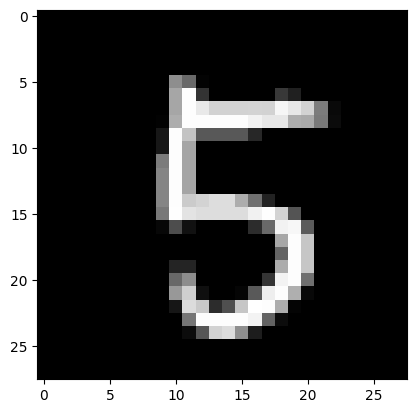

Prediction:  [6]
Label:  6.0


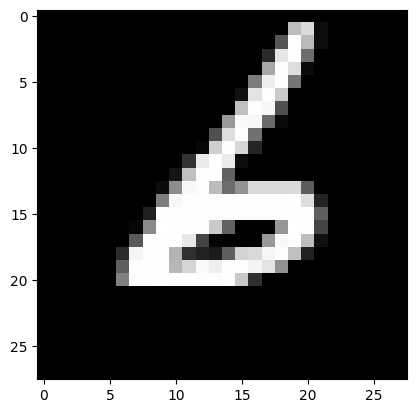

Prediction:  [9]
Label:  4.0


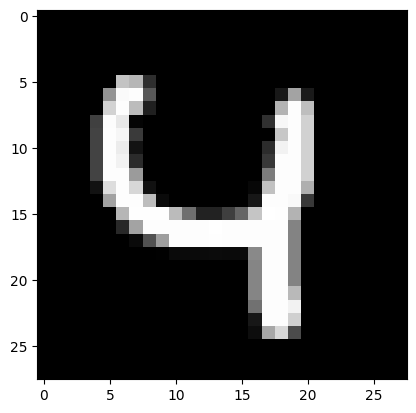

In [ ]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [ ]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
accuracy(dev_predictions, Y_dev)

[1 3 5 3 1 7 5 9 6 4 2 6 4 1 5 7 1 2 4 9 9 2 6 0 4 5 9 0 7 4 4 9 0 5 2 0 1
 3 4 2 0 1 0 4 8 0 3 8 8 0 4 9 1 0 4 6 1 6 9 2 7 3 7 7 5 4 9 8 9 5 7 7 7 4
 3 1 2 5 7 9 3 8 0 8 5 8 7 8 5 1 5 0 9 7 8 6 0 2 6 7 6 7 4 9 3 9 0 0 4 4 5
 4 4 2 5 0 4 7 6 8 4 7 1 4 1 9 2 3 8 9 7 0 3 8 6 3 2 4 0 4 5 4 4 3 2 4 5 2
 4 0 5 8 9 8 9 1 9 0 1 8 3 9 3 4 6 0 8 9 9 2 7 4 6 8 3 1 9 4 1 8 6 7 8 9 1
 5 0 2 6 6 8 2 1 7 3 1 4 9 8 5 0 1 1 4 0 5 2 2 5 9 6 4 1 3 6 7 9 1 1 1 8 9
 9 0 3 5 9 3 4 9 5 1 9 4 6 3 2 2 6 5 1 9 4 8 3 3 9 3 7 4 2 5 9 3 1 7 2 4 8
 8 1 9 4 6 0 7 2 0 1 6 6 6 6 5 7 0 5 8 6 7 4 0 7 2 4 4 3 2 8 5 7 2 2 3 6 9
 2 1 7 8 4 8 7 0 3 2 1 1 4 5 5 9 4 1 3 7 7 2 7 5 1 3 2 3 4 0 3 7 0 5 0 3 2
 8 1 8 5 7 3 1 0 2 2 1 1 2 1 5 1 6 5 6 1 7 9 7 9 9 7 9 4 9 2 3 9 4 0 8 5 1
 5 4 2 1 1 8 1 7 0 1 4 0 3 6 4 9 6 0 0 4 8 7 8 1 5 7 1 4 5 1 1 1 2 7 6 7 0
 3 6 2 3 2 9 5 9 9 6 5 1 5 5 3 5 3 2 1 0 7 4 0 3 3 7 6 6 3 9 6 8 5 0 0 5 3
 3 7 5 8 8 8 3 5 2 3 7 2 8 1 1 3 6 2 8 7 8 7 8 8 1 4 1 0 7 1 6 4 4 6 3 2 8
 5 7 2 3 2 8 6 6 4 0 2 0 

0.861